In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
file_name = "bench_500_10_1905.npz"

data = np.load(data_path+file_name, allow_pickle=True)
data_files = [data]
batch_sizes = [500]


In [ ]:
data_path = "../../../../install/real_demo/share/real_demo/data/planner/benchmark/"
batch_sizes = range(250, 1751, 250)
file_names = list()
for batch_size in batch_sizes:
    file_names.append(f"bench_{batch_size}_15_1903.npz") 

print(file_names)

data_files = list()
for file_name in file_names:
    data = np.load(data_path+file_name, allow_pickle=True)
    data_files.append(data)

In [25]:
key_list = data.files

for key in key_list:
    print(f'{key} : {data[key].shape}')

batch_size : (1,)
horizon : (1,)
total_time : (21,)
step_time : (21,)
success : (21,)
reason : (21,)
target_0 : (21, 7)
theta : (21,)
thetadot : (21,)
cost_r : (21,)
cost_eef_to_obj : (21,)
cost_obj_to_targ : (21,)
cost_dist : (21,)
cost_zy : (21,)


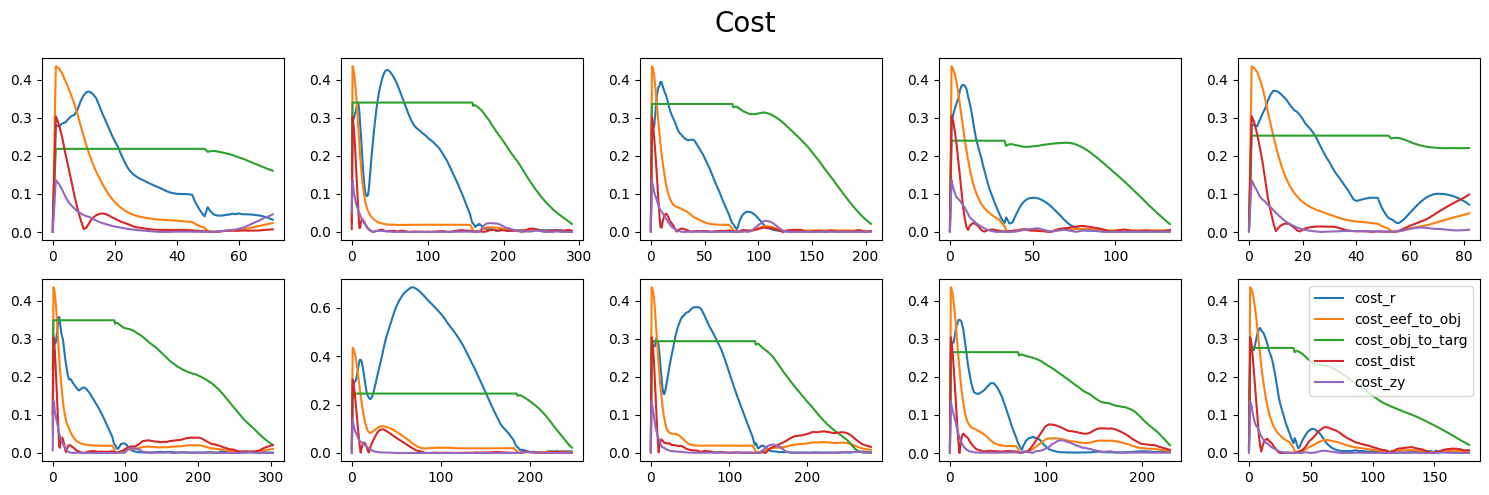

In [20]:
cost_name_list = ['cost_r', 'cost_eef_to_obj', 'cost_obj_to_targ', 'cost_dist', 'cost_zy']


fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        for cost in cost_name_list:
            axes[i, j].plot(data[cost][idx], label=cost)
        idx+=1

fig.suptitle("Cost", fontsize=20)

plt.tight_layout()  
plt.legend()
plt.show()

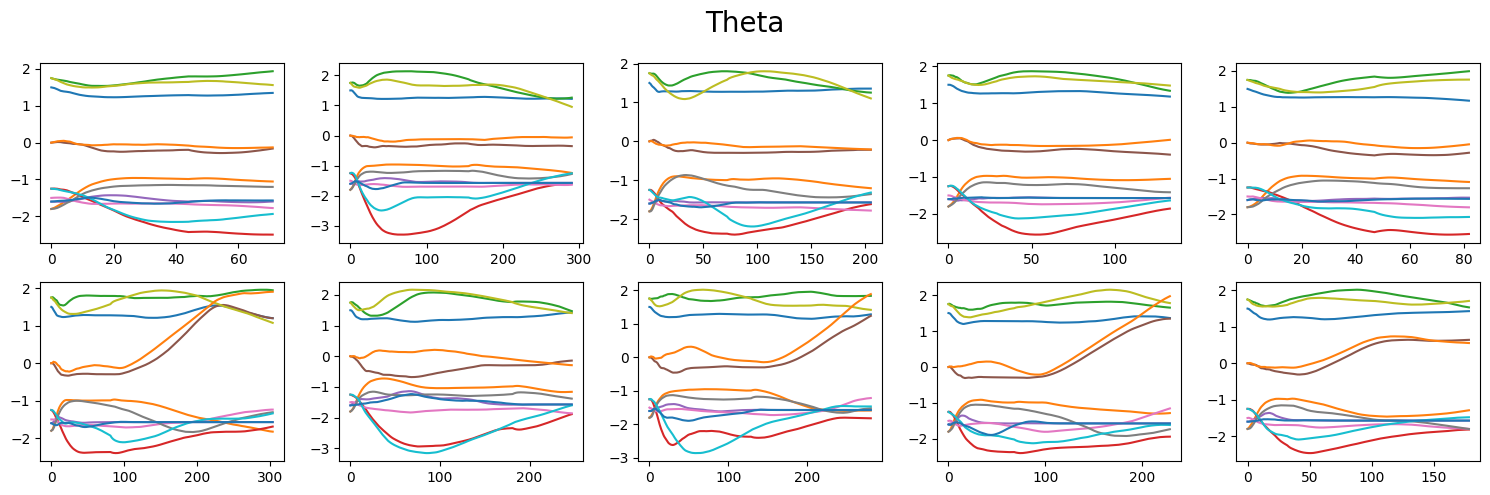

In [21]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        axes[i, j].plot(data['theta'][idx])
        idx+=1

fig.suptitle("Theta", fontsize=20)

plt.tight_layout()  
plt.show()

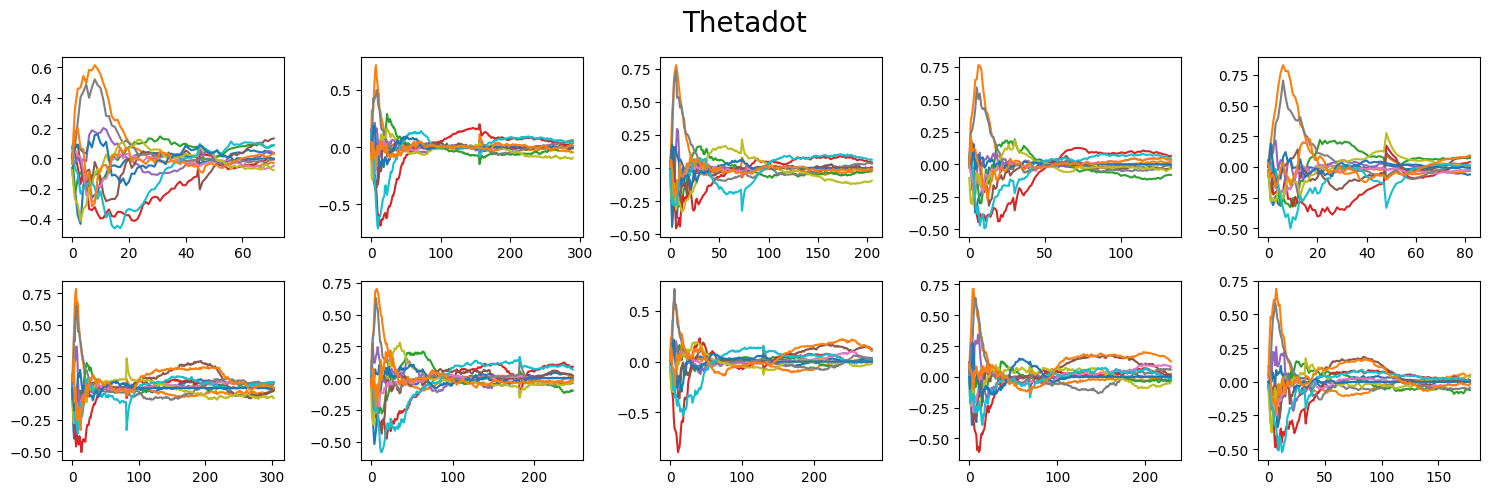

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
idx = 1
for i in range(2):
    for j in range(5):
        axes[i, j].plot(data['thetadot'][idx])
        idx+=1

fig.suptitle("Thetadot", fontsize=20)

plt.tight_layout()  
plt.show()

17
[85]


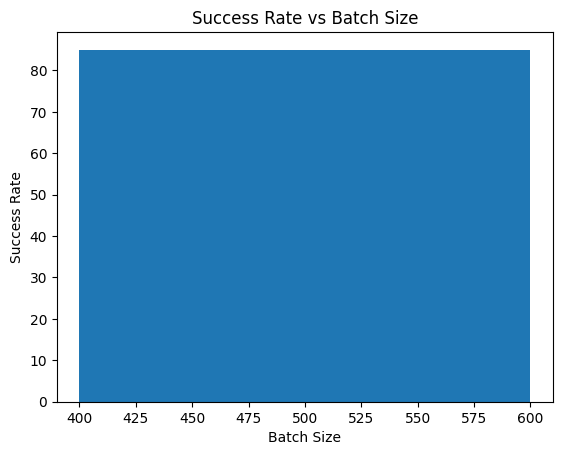

In [23]:
success_rate = list()
for data in data_files:
    success = data['success'][1:]
    print(sum(success))
    success_rate.append(int(sum(success)/len(success)*100))

print(success_rate)

plt.xlabel("Batch Size")
plt.ylabel("Success Rate")
plt.title("Success Rate vs Batch Size")
plt.bar(batch_sizes, success_rate, width=200)
plt.show()

In [24]:
data['reason'][1:]

array(['z', 'na', 'na', 'na', 'dist', 'na', 'na', 'na', 'na', 'na', 'z',
       'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na'], dtype='<U7')